# Gun Fatalities in the United States 
## Data Bootcamp - Undergraduate - Fall 2018
### Anvitha Jagannathan (aj2311@nyu.edu) and Javier Beltranena (jjb633@nyu.edu)

In the past year, the United States has witnessed hightened tensions sorrounding the US Constitution's 2nd ammendment regarding the right to bare arms. Politicians and civilians equally have become more divided on the topic after several shootings in public spaces and schools have taken the life of innocent Americans. In this project, we dive deep into the gun fatalities in the US to understand who are those that are being most affected. As our main source of data we used Five Thirty Eight's reasearch on gun fatalities from 2012 to 2014. We will also be using a complementary data source from the Washington Post.

We've split up this into three seperate parts: The first part will discuss the most common cause of gun deaths in the US: suicides. We want to dive deep into the demographics of suicides and develop an informed hypothesis about what are the major causes of suicide in the US. The second part analyzes homicides in the United States. We'll also investigate the demographics on homicides in the country to see who is more prone to gun violence in our country. The third part will look specifically into homicides by police officers and will investigate the claim that police officers are more prone to using deadly force against minority races such as blacks and hispanics versus majority race. 

In [1]:
import pandas as pd  # data package
import numpy as np
import matplotlib.pyplot as plt # graphics
import statsmodels.api as sm
%matplotlib inline

In [18]:
#Reading the Five Thirty-Eight file and cleaning the dataframe to be able to work with it
guns = (pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/guns-data/master/full_data.csv')
        .sort_values(['year','month']).rename(columns={'Unnamed: 0':'id'}).drop('hispanic',axis=1))
#We also cleaned the file to sort the deaths by year and month and renamed the first column to be the id.
#We dropped one more column that we found uneccesary for this project

Text(0,0.5,' ')

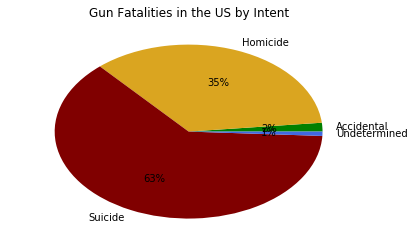

In [62]:
#Creating a pivot table that describes the number of deaths by year by intent
intents = guns.pivot_table(index='intent',columns='year',values='id',aggfunc=len)
intents['average'] = intents.mean(axis=1) #Adds a column that averages the fatalities per intent over the three years
fig,ax = plt.subplots()
intents['average'].plot.pie(y=' ',ax=ax,autopct='%1.0f%%', colors=['green','goldenrod','maroon','royalblue'])
ax.set_title('Gun Fatalities in the US by Intent')
ax.set_ylabel(' ')

In [64]:
intents

year,2012,2013,2014,average
intent,,,,
Accidental,548,505,586,546.333333
Homicide,12093,11674,11409,11725.333333
Suicide,20666,21175,21334,21058.333333
Undetermined,256,281,270,269.000000


### Suicides

Text(0,0.5,'Year')

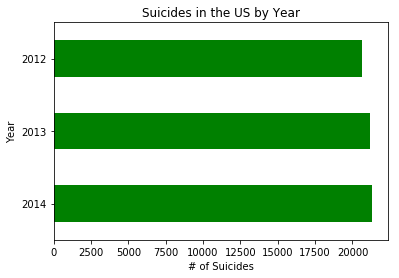

In [65]:
suicides = guns.loc[guns['intent']=='Suicide']# Filtering for all deaths with homicidal intent
fig,ax = plt.subplots()
suicides['year'].value_counts().plot.barh(ax = ax,color='green')
ax.set_title('Suicides in the US by Year')
ax.set_xlabel('# of Suicides')
ax.set_ylabel('Year')

Text(0.5,0,'Month')

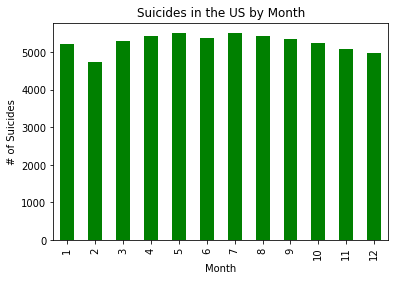

In [75]:
fig,ax = plt.subplots()
suicides['month'].value_counts().sort_index().plot.bar(ax = ax,color='green')
ax.set_title('Suicides in the US by Month')
ax.set_ylabel('# of Suicides')
ax.set_xlabel('Month')

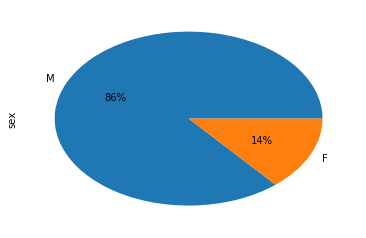

In [5]:
suicides['sex'].value_counts().plot.pie(autopct='%1.0f%%')

Text(0.5,0,'Year')

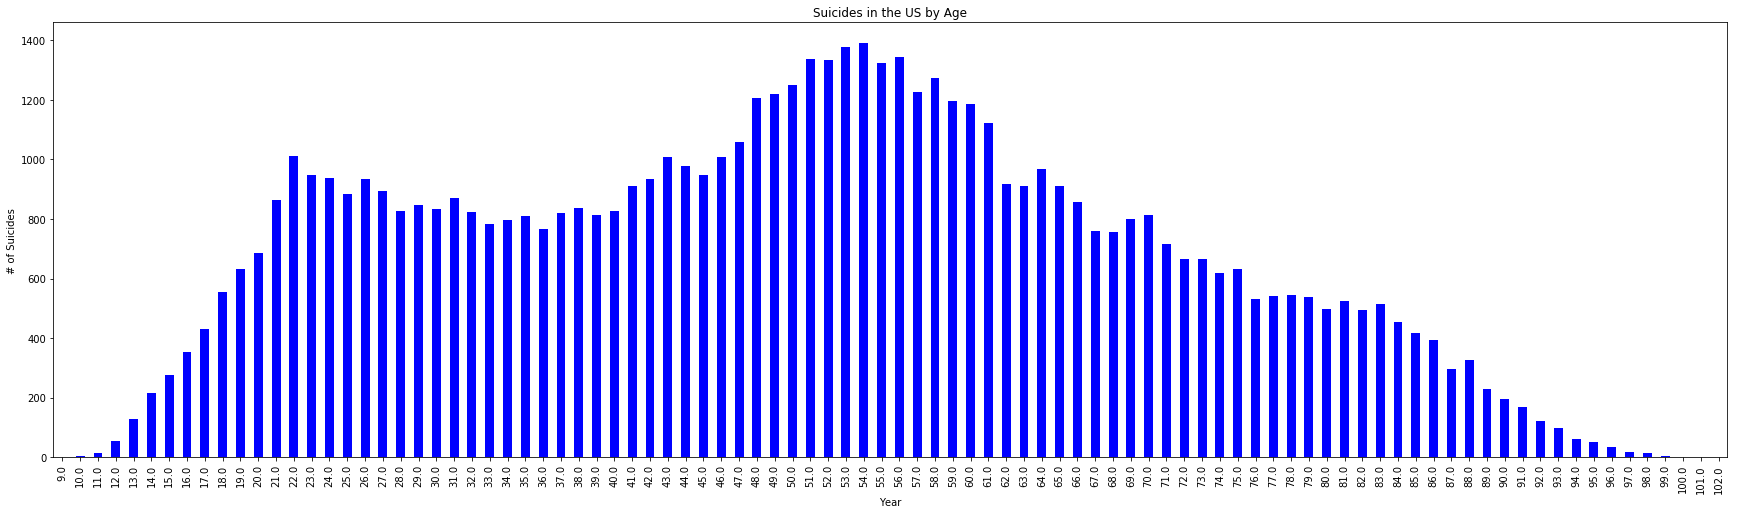

In [67]:
fig,ax = plt.subplots()
suicides['age'].value_counts().sort_index().plot.bar(ax = ax,color='blue',figsize=(30,8))
ax.set_title('Suicides in the US by Age')
ax.set_ylabel('# of Suicides')
ax.set_xlabel('Year')

Text(0,0.5,'Place')

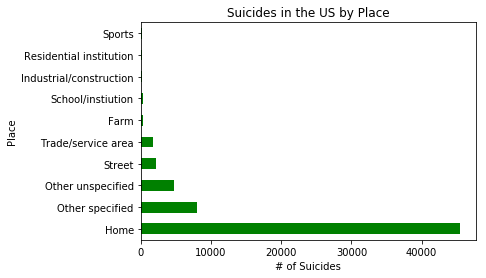

In [68]:
fig,ax = plt.subplots()
suicides['place'].value_counts().plot.barh(ax = ax,color='green')
ax.set_title('Suicides in the US by Place')
ax.set_xlabel('# of Suicides')
ax.set_ylabel('Place')

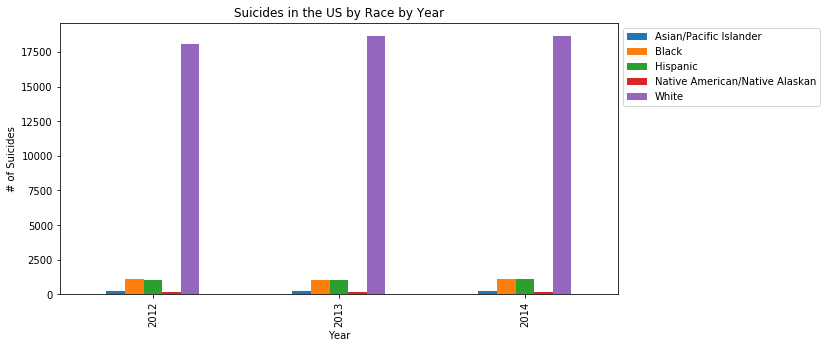

In [72]:
suicide_race=suicides.pivot_table(index='year',columns='race',values='id',aggfunc=len)
fig,ax = plt.subplots()
suicide_race.sort_index().plot.bar(ax=ax,figsize=(10,5))
ax.set_title('Suicides in the US by Race by Year')
ax.set_ylabel('# of Suicides')
ax.set_xlabel('Year')
ax.legend(bbox_to_anchor=(1,1),loc=0) #sets the legend of the bar graph outside the plot

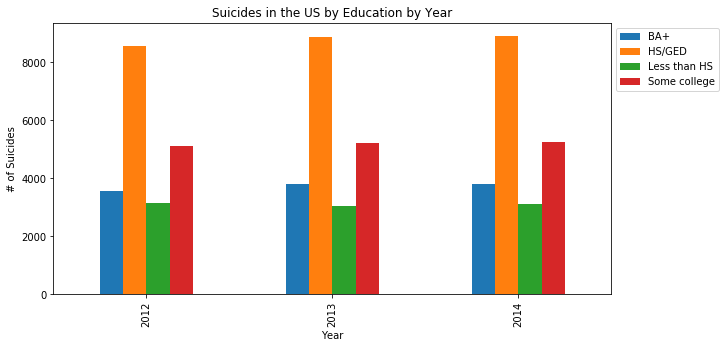

In [71]:
suicide_education=suicides.pivot_table(index='year',columns='education',values='id',aggfunc=len)
fig,ax = plt.subplots()
suicide_education.sort_index().plot.bar(ax=ax,figsize=(10,5))
ax.set_title('Suicides in the US by Education by Year')
ax.set_ylabel('# of Suicides')
ax.set_xlabel('Year')
ax.legend(bbox_to_anchor=(1,1),loc=0) #sets the legend of the bar graph outside the plot

From the graphs above, we can easily see that suicide rates increased between 2012 and 2014. Feburary has the lowest number of suicides, while May and July have the highest. 86% of reported suicides in US between 2012 and 2014 were male, while only 14% were female. Most suicides happen at home, possibly because most people feel safest and/or most stressed there. Most reported suicides were by white people. Suicide rates among high school graduates and college graduates increased between 2012 and 2014. The age group with the highest suicide rate was 51-60, with 54 year olds forming the peak. There is a smaller, yet significant peak at the age of 22. All this leads us to believe that many, if not most, of these suicides might have been caused by employement issues, debt issues, mid-life crises etc.

### Homicides
The second largest intent group within gun deaths in America is homicide. We've already seen that gun deaths in the United States tend to be more common among men than women and we don't suspect that this could be any different when narrowing down the deaths to homicides. However, something we want to explore within this category is race. For the past decades, our media has focused a lot on violence in minoirty communities such as black and hispanic

In [8]:
homicide = guns.loc[guns['intent'] == 'Homicide'] # Filtering for all deaths with homicidal intent
#Creating a data frame for the number of homicides per year per race 
hom_race = homicide.pivot_table(index='year',columns='race',values='id',aggfunc=len)
hom_race

race,Asian/Pacific Islander,Black,Hispanic,Native American/Native Alaskan,White
year,,,,,
2012,205,6676,1971,105,3136
2013,181,6503,1836,97,3057
2014,173,6331,1827,124,2954


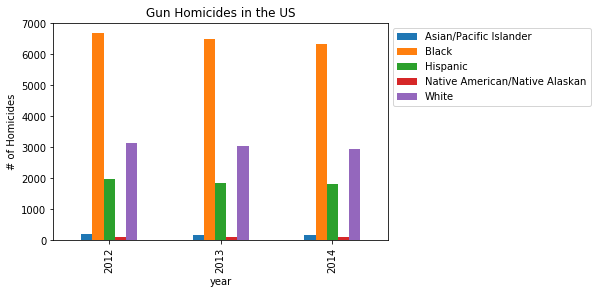

In [9]:
fig,ax = plt.subplots()
hom_race.plot.bar(ax = ax)
ax.set_title('Gun Homicides in the US')
ax.set_ylabel('# of Homicides')
ax.legend(bbox_to_anchor=(1,1),loc=0) #sets the legend of the bar graph outside the plot

The information above confirms what popular media has been saying. More than double the amount of black people in America die by gun shot than white people. But the data from the CDC enables us to dig deeper into who is perpetrating the homicide, specifically, deaths perpetrated by police officers. 
A controversial topic in popular media today has been the huge racial disparities in how US police use force. The data from the CDC might enable us to dig deeper into how each race is being treated differently by US police.

In [10]:
#Creating a dataframe for homicides in which police was involved per race per year
hom_pol = homicide.loc[homicide['police']==1].pivot_table(index='year',columns='race',values='id',aggfunc=len)
hom_pol['total']= hom_pol.sum(axis=1)
hom_pol['%Black'] = hom_pol['Black']/hom_pol['total']
hom_pol['%Hispanic'] = hom_pol['Hispanic']/hom_pol['total']
hom_pol

race,Asian/Pacific Islander,Black,Hispanic,Native American/Native Alaskan,White,total,%Black,%Hispanic
year,,,,,,,,
2012,10,121,101,10,229,471,0.256900,0.214437
2013,11,129,86,4,237,467,0.276231,0.184154
2014,9,106,95,11,243,464,0.228448,0.204741


In [11]:
hom_pol.mean()

race
Asian/Pacific Islander             10.000000
Black                             118.666667
Hispanic                           94.000000
Native American/Native Alaskan      8.333333
White                             236.333333
total                             467.333333
%Black                              0.253860
%Hispanic                           0.201111
dtype: float64

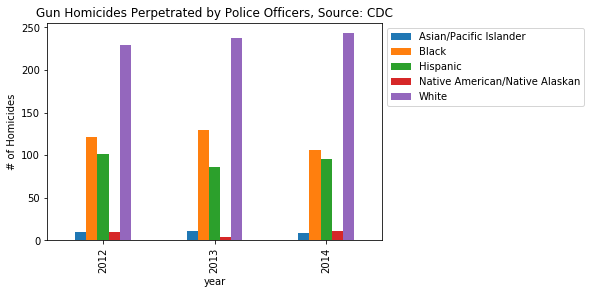

In [12]:
fig,ax = plt.subplots()
hom_pol[['Asian/Pacific Islander','Black','Hispanic', 'Native American/Native Alaskan', 'White']].plot.bar(ax = ax)
ax.set_title('Gun Homicides Perpetrated by Police Officers, Source: CDC')
ax.set_ylabel('# of Homicides')
ax.legend(bbox_to_anchor=(1,1),loc=0) #sets the legend of the bar graph outside the plot

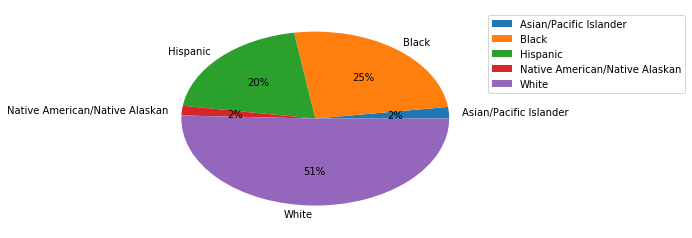

In [51]:
#Creating a dataset that transposes the pervious one, putting the years as columns and the races as rows
trans_hom_pol = hom_pol[['Asian/Pacific Islander','Black','Hispanic', 'Native American/Native Alaskan', 'White']].transpose()
#Adding one more column for the average number of homicides per race for the three years
trans_hom_pol['Average']=trans_hom_pol.mean(axis=1)
#Plotting the average % of homicides per race
fig,ax = plt.subplots()
trans_hom_pol.plot.pie(y='Average',ax=ax,autopct='%1.0f%%')
ax.set_ylabel('')
ax.legend(bbox_to_anchor=(1,1),loc=0) #sets the legend of the bar graph outside the plot

It is interesting to see that fatal police shootings happen more often with white people than minority populations. Simply looking at the total number of fatalities per race is not accurate because it assumes that the US population is composed by an equal amount of people from each race. According to the Census Bureau, the US population is composed of 64% whites, 12% black and 16% hispanic or latino. Nevertheless, Black and Hispanic populations represent 25% and 20% of fatal police shootings on average each year respectively.

However, we have to keep in mind that this data is reported by the Center for Disease Control, a government agency who benefits from misrepresenting or undereporting data such as fatal police shootings. Thus we decided to consult another source for data on fatal police shootings. Although the data from the Washington Post only has data after 2014, it is impossible to match both sources. However, according to the CDC, fatal police shootings by race have remained relatively constant as shown below. Thus, we could expect the data from the Washington Post to be similar to that of the CDC. Below we analyze the data from the Washington Post and compare it to that of the CDC:

In [27]:
#Reading data from the Washington Post on shootings by police officers
wp_guns = pd.read_csv('https://raw.githubusercontent.com/washingtonpost/data-police-shootings/master/fatal-police-shootings-data.csv')
#Creating a column out of the first 4 characters of the string in 'Date' for the year of the homicide
wp_guns['year'] = wp_guns['date'].str.slice(0,4)
#Creating a column out of the 6th and 7th characters of the string in 'Date' for the month of the homicide
wp_guns['month'] = wp_guns['date'].str.slice(5,7)
#Dropping the column date
wp_guns['date'].drop
wp_guns

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year,month
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,2015,01
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,2015,01
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,2015,01
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,2015,01
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,2015,01
5,11,Kenneth Joe Brown,2015-01-04,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False,2015,01
6,13,Kenneth Arnold Buck,2015-01-05,shot,gun,22.0,M,H,Chandler,AZ,False,attack,Car,False,2015,01
7,15,Brock Nichols,2015-01-06,shot,gun,35.0,M,W,Assaria,KS,False,attack,Not fleeing,False,2015,01
8,16,Autumn Steele,2015-01-06,shot,unarmed,34.0,F,W,Burlington,IA,False,other,Not fleeing,True,2015,01
9,17,Leslie Sapp III,2015-01-06,shot,toy weapon,47.0,M,B,Knoxville,PA,False,attack,Not fleeing,False,2015,01


In [28]:
#Creating a dataframe with police homicides per year per race according to the Washington Post
wp_race = wp_guns.pivot_table(index='year',columns='race',values='id',aggfunc=len).drop('2018')
wp_race ['total'] = wp_race.sum(axis=1)
wp_race.columns = ['Asian', 'Black','Hispanic','Native American','Other','White','total']
wp_race

,Asian,Black,Hispanic,Native American,Other,White,total
year,,,,,,,
2015,14,259,172,9,15,497,966
2016,15,234,160,16,11,466,902
2017,16,223,179,22,6,459,905


In [29]:
wp_race.mean()

Asian               15.000000
Black              238.666667
Hispanic           170.333333
Native American     15.666667
Other               10.666667
White              474.000000
total              924.333333
dtype: float64

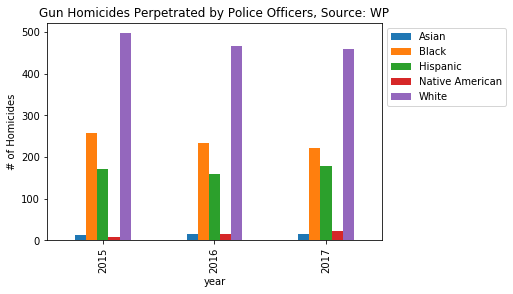

In [30]:
fig,ax = plt.subplots()
wp_race[['Asian', 'Black','Hispanic','Native American','White']].plot.bar(ax=ax)
ax.set_title('Gun Homicides Perpetrated by Police Officers, Source: WP')
ax.set_ylabel('# of Homicides')
ax.legend(bbox_to_anchor=(1,1),loc=0) #sets the legend of the bar graph outside the plot

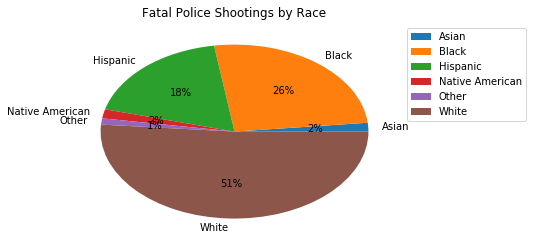

In [78]:
trans_wp_race = wp_race.transpose().drop('total')
trans_wp_race['Average']=trans_wp_race.mean(axis=1)
fig,ax = plt.subplots()
trans_wp_race.plot.pie(y='Average',ax=ax,autopct='%1.0f%%')
ax.set_ylabel('')
ax.set_title('Fatal Police Shootings by Race')
ax.legend(bbox_to_anchor=(1,1),loc=0) #sets the legend of the bar graph outside the plot

The data from the Washington Post is consistent with the CDC in terms of pecentage of fatal shootings by race. Police shooting of white people are significantly more common than those of Black or Hispanic. However, the CDC appears to be massively underreporting fatal shootings for all races. According to the Washington Post, there is an average of 924.33 fatal police shootings per year from 2015 through 2017 while the CDC reported an average of 467.33 fatal police shootings per year.

The data from the Washington Post enables us to analyze these police shooting furthermore. We continue with the hypothesis that minorities are more prominent to get shot by police officers than other races. We know that minority populations tend to be poorer than others. Thus, we want to analyze how the percentage of police shootings per race correlate to the median income by state. To do so, we have to import more data that will provide us with the median income by state and run a regression model to see how these two variables compare to each other.

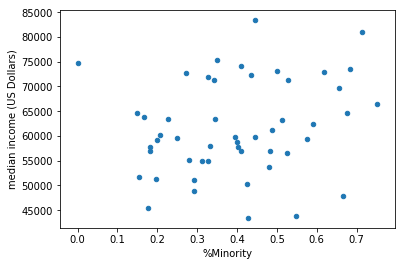

In [74]:
#Creating a dictionary and dataframe based on states and their abbreviations
states = {'AK': 'Alaska','AL': 'Alabama','AR': 'Arkansas','AS': 'American Samoa','AZ': 'Arizona','CA': 'California',
        'CO': 'Colorado','CT': 'Connecticut','DC': 'District of Columbia','DE': 'Delaware','FL': 'Florida',
        'GA': 'Georgia','GU': 'Guam','HI': 'Hawaii','IA': 'Iowa','ID': 'Idaho','IL': 'Illinois','IN': 'Indiana',
        'KS': 'Kansas','KY': 'Kentucky','LA': 'Louisiana','MA': 'Massachusetts','MD': 'Maryland','ME': 'Maine',
        'MI': 'Michigan','MN': 'Minnesota','MO': 'Missouri','MP': 'Northern Mariana Islands','MS': 'Mississippi',
        'MT': 'Montana','NA': 'National','NC': 'North Carolina','ND': 'North Dakota','NE': 'Nebraska',
        'NH': 'New Hampshire','NJ': 'New Jersey','NM': 'New Mexico','NV': 'Nevada','NY': 'New York','OH': 'Ohio',
        'OK': 'Oklahoma','OR': 'Oregon','PA': 'Pennsylvania','PR': 'Puerto Rico','RI': 'Rhode Island',
        'SC': 'South Carolina','SD': 'South Dakota','TN': 'Tennessee','TX': 'Texas','UT': 'Utah','VA': 'Virginia',
        'VI': 'Virgin Islands','VT': 'Vermont','WA': 'Washington','WI': 'Wisconsin','WV': 'West Virginia',
        'WY': 'Wyoming'}
state = pd.DataFrame(states, index=[1]).transpose().reset_index().rename(columns={'index':'abbrev', 1:'state'})
#Reading data on median income per state
state_income = pd.read_excel('/Users/javierbeltranena/Downloads/median-household-income-state.xlsx')
#Merging data on median income per state and state abbreviations
state_income = state_income.merge(state, how='inner', on='state')
#Creating a data frame with police homicides per state per race
state_homs = wp_guns.pivot_table(index='state',columns='race',values='id',aggfunc=len).fillna(0)
#Merging the past dataframe with the median income per state
state_hom_inc = state_homs.merge(state_income,how='inner',left_on='state',right_on='abbrev').set_index('state')
#Creating a column for the percentage of police homicides who were not White
state_hom_inc['%Minority']= 1-((state_hom_inc['W']+state_hom_inc['A'])/(state_hom_inc['A']+ state_hom_inc['B']
    + state_hom_inc['H'] + state_hom_inc['N'] + state_hom_inc['O'] + state_hom_inc['W']))
state_hom_inc[['median income (US Dollars)','%Minority']].plot.scatter(x='%Minority',y='median income (US Dollars)')

In [33]:
regression = sm.OLS(state_hom_inc['%Minority'],state_hom_inc['median income (US Dollars)'])
results = regression.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              %Minority   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     266.3
Date:                Wed, 19 Dec 2018   Prob (F-statistic):           1.92e-21
Time:                        14:58:50   Log-Likelihood:                 17.725
No. Observations:                  50   AIC:                            -33.45
Df Residuals:                      49   BIC:                            -31.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
median income (US Do

By running the regression model and looking at the graph, we can see that there is no correlation among bot factors. Perhaps analyzing this at such a broad level like state is not necesarilly accurate. Unfortunately we were unable to find complete accurate date for all the cities in which police shootings have occured according to the Washington Post and thus, narrowing this down to a city level is not possible.

## Conclusion

From the first part of our investigation, we have seen that the most common causes of suicides are probably income an employment related, or possibly due to mid-life crises. We can say this because most suicides are by white males around the age of 54. From the second part of our research, we have seen that most of the victims of gun homicides are black, although this population decreased from 6,676 to 6,331 between 2012 and 2014. From the third part of our research, we have seen that the CDC dramatically underreports police-related gun shootings. For example, while the CDC reported only 464 fatal police shootings in 2014 (with a decreasing trend), the Washington Post reported 966 fatal police shootings by 2015, which constitutes a growth of almost 107% from one year to the next one. We also learned that, although most victims of police shootings are white (51%), when compared to the US population demographics, black and hispanic communities experience more police brutality. Thus, we wanted to prove that minority populations, who typically earn less, are more vulnerable to police shootings. We did so by comparing the percentage of minority fatal shootings by police officers per state to median income by state. However, regressions at a state level showed no correlation between these two.

Further investigations could go deeper into the correlations between minority police shootings versus median income at a city or county level, which might show a greater correlation. Furthermore, more analysis could be done on the topic of suicide if information about the victims' income and workplace was available. This could enable us to perform some sort of automated machine learning that could identify factors that drive suicide rate and consequently potential suicide victims so that the US could take preventive measures.